In [2]:
import xarray as xa
import rioxarray as rxa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
from os.path import join
import scipy
from scipy.stats import mannwhitneyu, linregress

In [17]:
def datarray_to_numpy(x, y):
    if type(x)== xa.core.dataarray.DataArray:
        x_dirty = x.values.ravel()
        y = y.values.ravel()
    else:
        x_dirty = x
    x = x_dirty[(~np.isnan(x_dirty)) & (~np.isnan(y))]
    y = y[(~np.isnan(x_dirty)) & (~np.isnan(y))]
    return x, y
    
def r2_value(x, y):
    x, y = datarray_to_numpy(x,y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print(f'slope: {slope}. intercept: {intercept}. r_value {r_value}. p value: {p_value}')
    return slope, intercept, x, y

In [3]:
ds = xa.open_dataset('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/ds-lidar-us5.nc')
ds = ds.drop('spatial_ref')

In [9]:
pol = 'VV'

In [43]:
inc = np.append(ds['232_inc'].values.ravel(), ds['052_inc'].values.ravel())
cor_vv = np.append(ds[f'232_cor_{pol}'].values.ravel(), ds[f'232_cor_{pol}'].values.ravel())

In [18]:
slope, intercept, inc, cor = r2_value(ds['232_inc'], ds[f'232_cor_{pol}'])

slope: -0.2876228580616082. intercept: 0.7864009420426867. r_value -0.3542765102401879. p value: 0.0


In [46]:
slope, intercept, inc, cor = r2_value(ds['052_inc'], ds[f'052_cor_{pol}'])

slope: 0.06064506797637371. intercept: 0.39975667302231177. r_value 0.08038958011661956. p value: 0.0


In [45]:
slope, intercept, inc, cor = r2_value(inc, cor_vv)

slope: 0.0023584090473367674. intercept: 0.47927361690945536. r_value 0.0029444181624603883. p value: 3.6304036653090133e-12


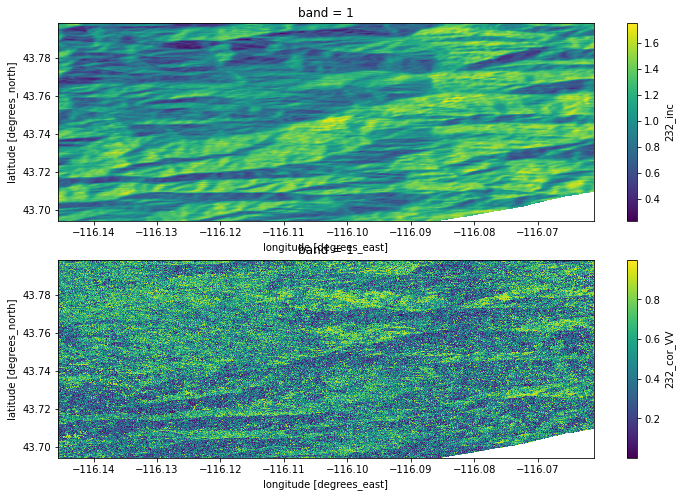

In [34]:
fig, axes = plt.subplots(2, figsize = (12,8))
ds['232_inc'].plot(ax = axes[0])
ds[f'232_cor_{pol}'].plot(ax = axes[1])

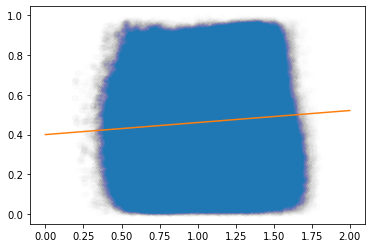

In [47]:
plt.scatter(inc, cor, alpha = 0.002)
xs = np.linspace(0, 2, 2000)
ys = slope*xs + intercept
plt.plot(xs, ys, color = 'C1')

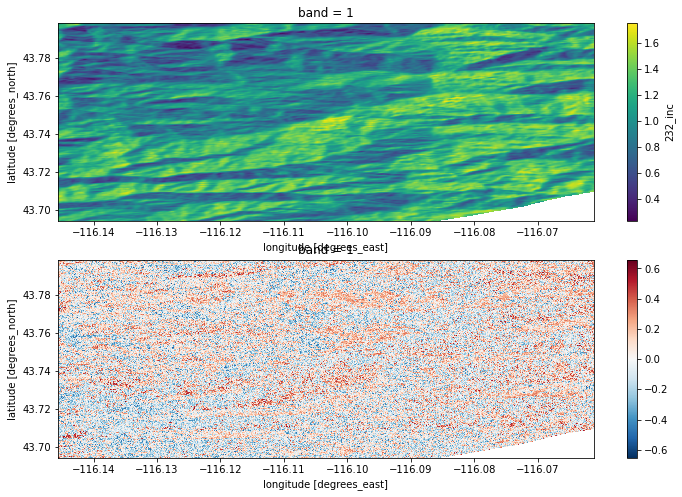

In [36]:
fig, axes = plt.subplots(2, figsize = (12,8))
ds['232_inc'].plot(ax = axes[0])
cor_corr = ds[f'232_cor_{pol}'] - (slope*ds['232_inc'] + intercept)
cor_corr.plot(ax = axes[1])